<a href="https://colab.research.google.com/github/arizonaCameraLab/computationalImaging/blob/master/Chapter10SamplingStrategy/SVD_Analysis_of_Sampling_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SVD Analysis of Two Signal Sampling Systems
 ## David Brady and Gemini
 ## September 2025




###Problem Description
We consider a one-dimensional signal, $f(x)$, which is known to be spatially confined to the range $x \in [-\frac{X}{2}, \frac{X}{2}]$. We aim to compare the efficacy of two different systems for sampling this signal.

### The Sampling Systems

The measurements are based on two distinct sets of sampling functions.
#### System 1
This system utilizes a single sampling function, $h_1(x)$, defined as: $$ h_1(x) = {\rm sinc}^2(x) $$
#### System 2
This system uses two sampling functions, adding $h_2(x)$ to the function from System 1:

\begin{align*} h_1(x) &= {\rm sinc}^2(x) \\ h_2(x) &= \frac{3}{\pi^2} \left( \frac{d}{dx} {\rm sinc}(x) \right)^2 \end{align*}

For both systems, a set of measurements $\{g_{in}\}$ is obtained by sampling the signal at discrete shifts, such that the measurement kernels are $h_i(x - n/2)$, with $n$ being an integer.

#### Methodology
*Measurement Matrix Construction* For each system and for a given signal width $X$, we construct a discrete measurement matrix, $\mathbf{H}$. The spatial domain $x \in [-X/2, X/2]$ is discretized into 1024 points. Each row of the matrix $\mathbf{H}$ corresponds to a single measurement, representing one of the sampling functions $h_i(x)$ shifted by $n/2$ (for $n \in \{-10, \dots, 10\}$) and evaluated over the discrete spatial grid.

*Singular Value Decomposition (SVD)* The SVD of the measurement matrix, $\mathbf{H} = \mathbf{U}\boldsymbol{\Sigma}\mathbf{V}^*$, provides insight into the properties of the measurement system. The singular values, $\sigma_i$ (the diagonal elements of $\boldsymbol{\Sigma}$), are of primary interest. A slow decay in the sequence of singular values indicates that the system possesses a larger number of significant, orthogonal measurement modes, and is thus better able to capture diverse features within the signal.

#### Comparison Framework
The analysis is conducted for four different signal confinement widths: $X \in \{0.5, 1, 5, 10\}$. For each case, the singular values for both systems are computed and then normalized by their respective largest value ($\sigma_i / \sigma_0$). These normalized singular values are then plotted on a semi-logarithmic scale to facilitate a direct comparison of their decay rates.

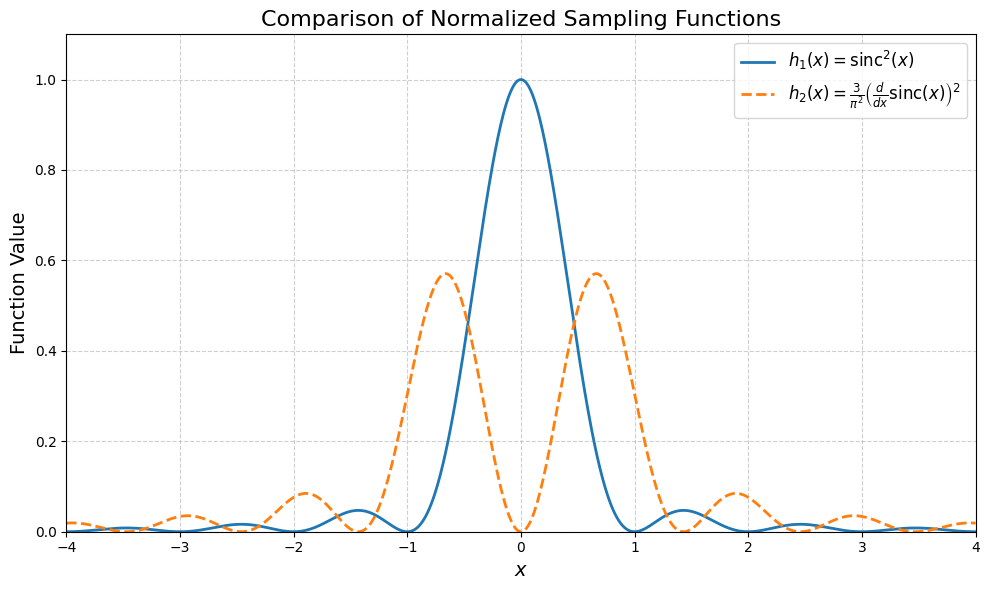

In [11]:

def derivative_sinc(x):
    """
    Calculates the derivative of the normalized sinc function, sinc(x) = sin(pi*x)/(pi*x).
    Handles the case x=0 where the derivative is 0.
    """
    # Avoid division by zero at x=0. The limit of the derivative at x=0 is 0.
    numerator = np.pi * x * np.cos(np.pi * x) - np.sin(np.pi * x)
    denominator = np.pi * x**2

    # Use np.where to handle the condition gracefully without warnings
    derivative = np.where(denominator != 0, numerator / denominator, 0)
    return derivative

def h1_func(x):
    """
    Calculates the first sampling function, h_1(x) = sinc^2(x).
    np.sinc is the normalized sinc function sin(pi*x)/(pi*x).
    """
    return np.sinc(x)**2

def h2_func(x):
    """
    Calculates the second sampling function with the updated definition:
    h_2(x) = (3/pi^2) * (d(sinc(x))/dx)^2.
    """
    return (3.0 / (np.pi**2)) * (derivative_sinc(x))**2

if __name__ == '__main__':
    # Define the spatial domain for plotting
    # A range from -4 to 4 should be sufficient to see the main features
    x = np.linspace(-4, 4, 1000)

    # Calculate the values of the two sampling functions
    h1 = h1_func(x)
    h2 = h2_func(x)

    # --- Create the Publication-Quality Figure ---

    # Set up the plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the two functions with distinct styles
    ax.plot(x, h1, label=r'$h_1(x) = \mathrm{sinc}^2(x)$', linewidth=2)
    ax.plot(x, h2, label=r'$h_2(x) = \frac{3}{\pi^2} \left( \frac{d}{dx} \mathrm{sinc}(x) \right)^2$', linestyle='--', linewidth=2)

    # Set titles and labels with appropriate font sizes
    #ax.set_title('Comparison of Normalized Sampling Functions', fontsize=16)
    ax.set_xlabel('$x$', fontsize=14)
    ax.set_ylabel('Function Value', fontsize=14)

    # Add a legend to identify the functions
    ax.legend(fontsize=12)

    # Add a grid for better readability
    ax.grid(True, which="both", ls="--", alpha=0.6)

    # Set axis limits to focus on the main features
    ax.set_xlim([-4, 4])
    # Adjust y-limit as the peak of h2 will be lower now
    ax.set_ylim([0, 1.1])

    # Ensure a clean layout
    plt.tight_layout()
    plt.savefig('sampling_functions.png', dpi=300)
    # Display the plot
    plt.show()



Processing case for X = 0.5...
Processing case for X = 1...
Processing case for X = 5...
Processing case for X = 10...


/tmp/ipython-input-1310225253.py:14: RuntimeWarning: invalid value encountered in divide
  derivative = np.where(denominator != 0, numerator / denominator, 0)


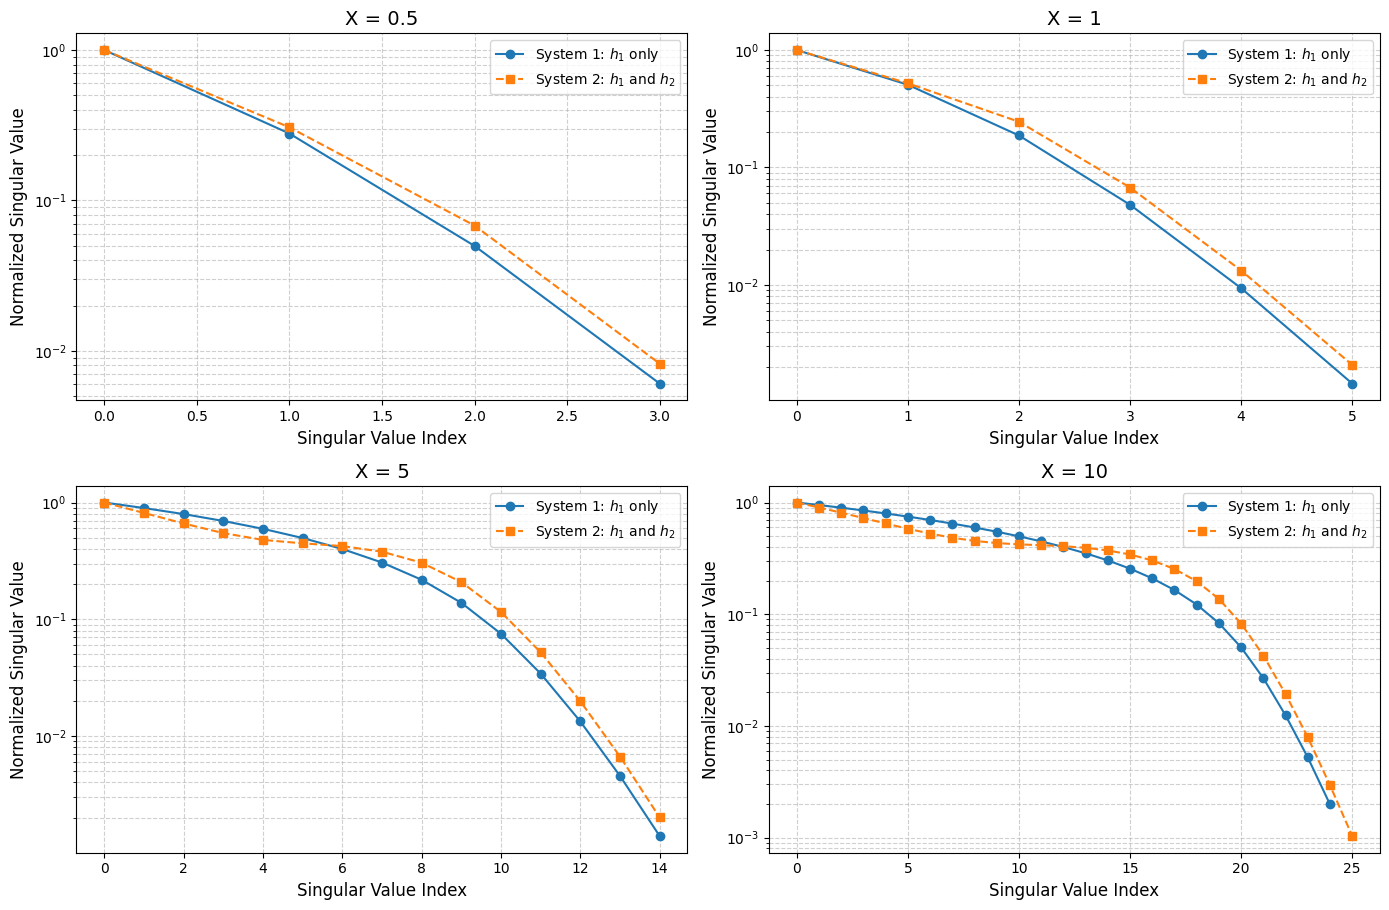

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def derivative_sinc(x):
    """
    Calculates the derivative of the normalized sinc function, sinc(x) = sin(pi*x)/(pi*x).
    Handles the case x=0 where the derivative is 0.
    """
    # Avoid division by zero at x=0. The limit of the derivative at x=0 is 0.
    numerator = np.pi * x * np.cos(np.pi * x) - np.sin(np.pi * x)
    denominator = np.pi * x**2

    # Use np.where to handle the condition gracefully without warnings
    derivative = np.where(denominator != 0, numerator / denominator, 0)
    return derivative

def h1_func(x):
    """
    Calculates the first sampling function, h_1(x) = sinc^2(x).
    np.sinc is the normalized sinc function sin(pi*x)/(pi*x).
    """
    return np.sinc(x)**2

def h2_func(x):
    """
    Calculates the second sampling function with the updated definition:
    h_2(x) = (3/pi^2) * (d(sinc(x))/dx)^2.
    """
    return (3.0 / (np.pi**2)) * (derivative_sinc(x))**2

def analyze_and_plot(X, n_points, n_shifts, ax):
    """
    Constructs the measurement matrices, computes SVD, and plots the results on a given axis.
    """
    x_range = np.linspace(-X/2.0, X/2.0, n_points)
    shifts = np.arange(-n_shifts, n_shifts + 1) / 2.0

    # --- System 1 Matrix (H1) ---
    H1_rows = []
    for n_val in shifts:
        row = h1_func(x_range - n_val)
        H1_rows.append(row)
    H1 = np.array(H1_rows)

    # --- System 2 Matrix (H2) ---
    H2_rows = []
    for n_val in shifts:
        row1 = h1_func(x_range - n_val)
        row2 = h2_func(x_range - n_val)
        H2_rows.append(row1)
        H2_rows.append(row2)
    H2 = np.array(H2_rows)

    # --- SVD Calculation ---
    s1 = np.linalg.svd(H1, compute_uv=False)
    s2 = np.linalg.svd(H2, compute_uv=False)

    # --- Normalization and Filtering ---
    s1_norm = s1 / s1[0]
    s2_norm = s2 / s2[0]

    lambda_limit = 0.001
    s1_filtered = s1_norm[s1_norm > lambda_limit]
    s2_filtered = s2_norm[s2_norm > lambda_limit]

    # --- Plotting ---
    ax.semilogy(s1_filtered, 'o-', label='System 1: $h_1$ only')
    ax.semilogy(s2_filtered, 's--', label='System 2: $h_1$ and $h_2$')
    ax.set_title(f'X = {X}', fontsize=14)
    ax.grid(True, which="both", ls="--", alpha=0.6)
    ax.set_xlabel('Singular Value Index', fontsize=12)
    ax.set_ylabel('Normalized Singular Value', fontsize=12)
    ax.legend()

if __name__ == '__main__':
    # --- Simulation Parameters ---
    X_values = [0.5, 1, 5, 10]
    n_points = 1024  # Number of points in the spatial domain
    n_shifts = 30    # n goes from -10 to 10

    # --- Create the 2x2 Publication Figure ---
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    # Flatten axes array for easy iteration
    axes = axes.ravel()

    for i, X in enumerate(X_values):
        print(f"Processing case for X = {X}...")
        analyze_and_plot(X, n_points, n_shifts, axes[i])

   # fig.suptitle('SVD of Measurement Matrices with $h_2(x) = \\frac{3}{\pi^2} (\\frac{d}{dx} \\mathrm{sinc}(x))^2$', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
    plt.savefig('Modal_svd_comparison.png', dpi=300)
    plt.show()



Processing case for X = 1...
Processing case for X = 2...
Processing case for X = 5...
Processing case for X = 10...


/tmp/ipython-input-161703611.py:14: RuntimeWarning: invalid value encountered in divide
  derivative = np.where(denominator != 0, numerator / denominator, 0)


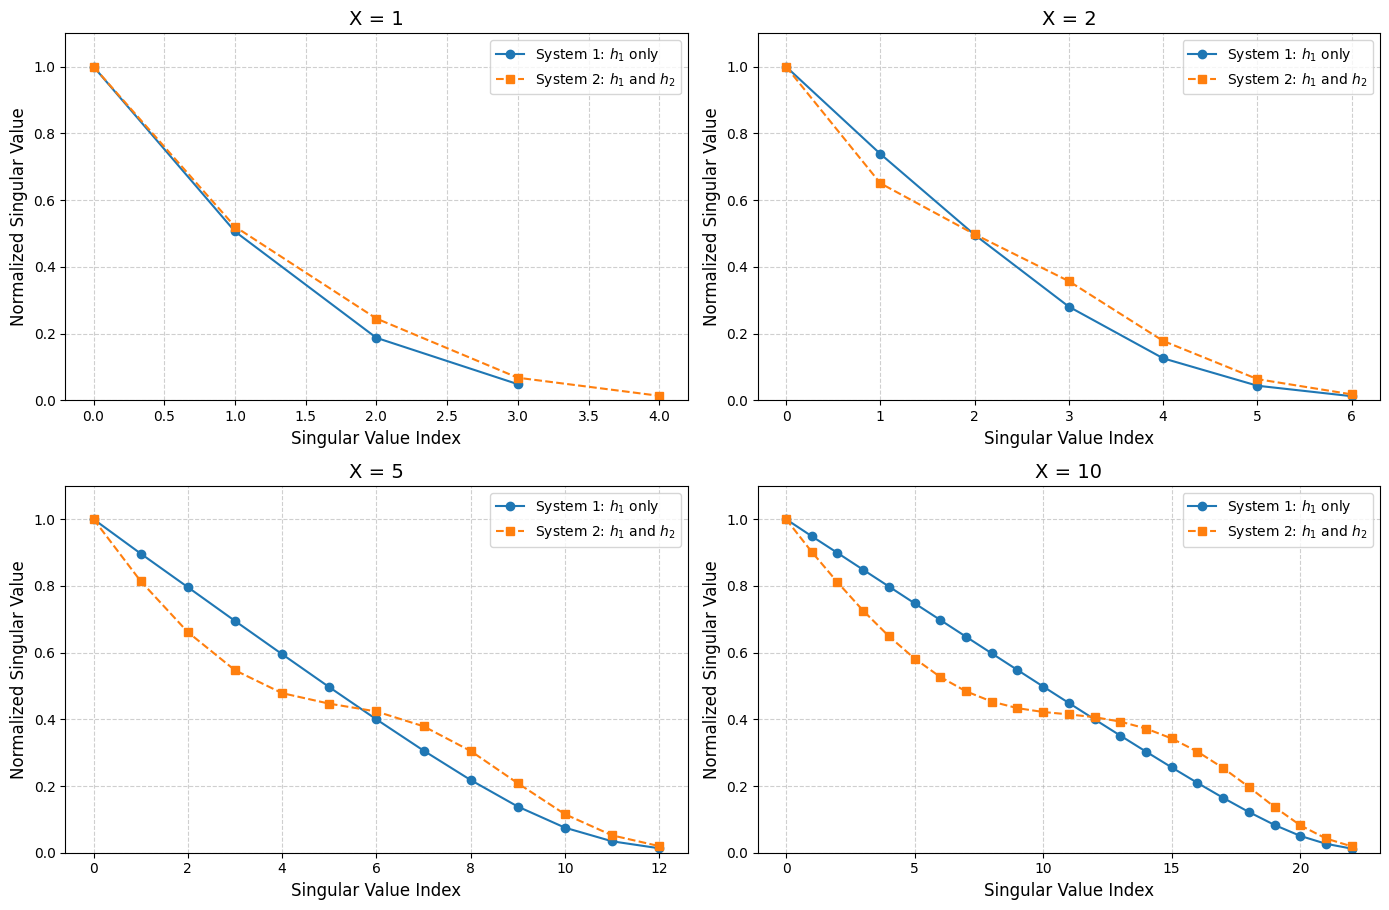

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def derivative_sinc(x):
    """
    Calculates the derivative of the normalized sinc function, sinc(x) = sin(pi*x)/(pi*x).
    Handles the case x=0 where the derivative is 0.
    """
    # Avoid division by zero at x=0. The limit of the derivative at x=0 is 0.
    numerator = np.pi * x * np.cos(np.pi * x) - np.sin(np.pi * x)
    denominator = np.pi * x**2

    # Use np.where to handle the condition gracefully without warnings
    derivative = np.where(denominator != 0, numerator / denominator, 0)
    return derivative

def h1_func(x):
    """
    Calculates the first sampling function, h_1(x) = sinc^2(x).
    np.sinc is the normalized sinc function sin(pi*x)/(pi*x).
    """
    return np.sinc(x)**2

def h2_func(x):
    """
    Calculates the second sampling function with the updated definition:
    h_2(x) = (3/pi^2) * (d(sinc(x))/dx)^2.
    """
    return (3.0 / (np.pi**2)) * (derivative_sinc(x))**2

def analyze_and_plot(X, n_points, n_shifts, ax):
    """
    Constructs the measurement matrices, computes SVD, and plots the results on a given axis.
    """
    x_range = np.linspace(-X/2.0, X/2.0, n_points)
    shifts = np.arange(-n_shifts, n_shifts + 1) / 2.0

    # --- System 1 Matrix (H1) ---
    H1_rows = []
    for n_val in shifts:
        row = h1_func(x_range - n_val)
        H1_rows.append(row)
    H1 = np.array(H1_rows)

    # --- System 2 Matrix (H2) ---
    H2_rows = []
    for n_val in shifts:
        row1 = h1_func(x_range - n_val)
        row2 = h2_func(x_range - n_val)
        H2_rows.append(row1)
        H2_rows.append(row2)
    H2 = np.array(H2_rows)

    # --- SVD Calculation ---
    s1 = np.linalg.svd(H1, compute_uv=False)
    s2 = np.linalg.svd(H2, compute_uv=False)

    # --- Normalization and Filtering ---
    s1_norm = s1 / s1[0]
    s2_norm = s2 / s2[0]

    # Updated lambda limit
    lambda_limit = 0.01
    s1_filtered = s1_norm[s1_norm > lambda_limit]
    s2_filtered = s2_norm[s2_norm > lambda_limit]

    # --- Plotting on a Linear Scale ---
    ax.plot(s1_filtered, 'o-', label='System 1: $h_1$ only')
    ax.plot(s2_filtered, 's--', label='System 2: $h_1$ and $h_2$')
    ax.set_title(f'X = {X}', fontsize=14)
    ax.grid(True, which="both", ls="--", alpha=0.6)
    ax.set_xlabel('Singular Value Index', fontsize=12)
    ax.set_ylabel('Normalized Singular Value', fontsize=12)
    ax.set_ylim(0, 1.1) # Set y-axis limit for linear scale
    ax.legend()

if __name__ == '__main__':
    # --- Simulation Parameters ---
    X_values = [1, 2, 5, 10]
    n_points = 1024  # Number of points in the spatial domain
    n_shifts = 20    # n goes from -20 to 20

    # --- Create the 2x2 Publication Figure ---
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    # Flatten axes array for easy iteration
    axes = axes.ravel()

    for i, X in enumerate(X_values):
        print(f"Processing case for X = {X}...")
        analyze_and_plot(X, n_points, n_shifts, axes[i])

    #fig.suptitle('SVD of Measurement Matrices with $h_2(x) = \\frac{3}{\pi^2} (\\frac{d}{dx} \\mathrm{sinc}(x))^2$', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
    plt.show()

